In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from PIL import Image
from glob import glob
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data_dir = "/content/drive/MyDrive/FoodImage"
#/content/drive/MyDrive/FoodImage/train
train_dir = data_dir + "/train"
test_dir = data_dir + "/valid"
FoodImages = os.listdir(train_dir)

In [15]:
number_of_class = (len(FoodImages))
print("Total Food Images classes are: {}".format(number_of_class))


Total Food Images classes are: 6


In [16]:
items = []
NumberOfFoodImages = 0
 #= os.listdir(FoodImages)
nums = {}
for item in FoodImages:
    #print(item)
    nums[item] = len(os.listdir(train_dir +'/'+ item))
    if item in items:
        items.append(item)
print(items)
print(nums)


[]
{'ApplePie': 93, 'Bibimbop': 92, 'Bread': 90, 'FriedRice': 88, 'BagelSandwich': 45, 'Pork': 89}


In [17]:
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
ApplePie,93
Bibimbop,92
Bread,90
FriedRice,88
BagelSandwich,45
Pork,89


Text(0.5, 1.0, 'Images per each class of food items')

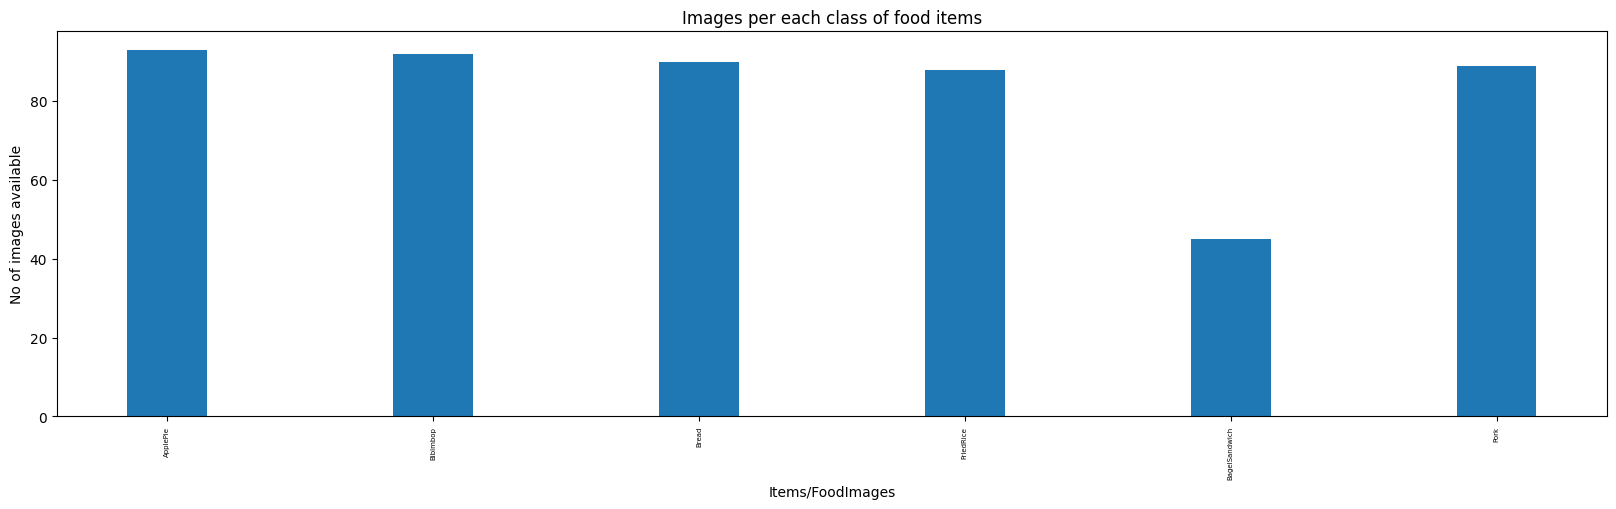

In [18]:
# plotting number of images available for each food items
index = [n for n in range(len(FoodImages))]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Items/FoodImages', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, FoodImages, fontsize=5, rotation=90)
plt.title('Images per each class of food items')

In [19]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 497 images for training


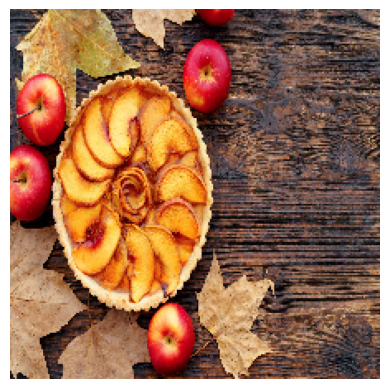

(224, 224, 3)


In [20]:
#Displaying the image
img = load_img(train_dir + "/ApplePie/A020511XX_02582.jpg", target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

In [21]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

model.save_weights('fruitImage_CNN_model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                  

In [22]:
#Specifing epochs & batch size
epochs = 50
batch_size = 3

In [23]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_dir,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
directory = test_dir,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 497 images belonging to 6 classes.
Found 150 images belonging to 6 classes.


In [24]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = n_train//batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 150//batch_size)

<ipython-input-24-e3e551931f1b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/50
165/165 [==============================] - 314s 2s/step - loss: 1.9702 - accuracy: 0.2490 - val_loss: 1.6441 - val_accuracy: 0.3867
Epoch 2/50
165/165 [==============================] - 42s 257ms/step - loss: 1.5912 - accuracy: 0.3664 - val_loss: 1.3287 - val_accuracy: 0.5467
Epoch 3/50
165/165 [==============================] - 43s 261ms/step - loss: 1.4788 - accuracy: 0.4312 - val_loss: 1.1946 - val_accuracy: 0.5733
Epoch 4/50
165/165 [==============================] - 43s 263ms/step - loss: 1.3832 - accuracy: 0.5344 - val_loss: 1.1643 - val_accuracy: 0.5733
Epoch 5/50
165/165 [==============================] - 43s 260ms/step - loss: 1.3066 - accuracy: 0.5101 - val_loss: 1.2710 - val_accuracy: 0.5733
Epoch 6/50
165/165 [==============================] - 42s 256ms/step - loss: 1.2331 - accuracy: 0.5709 - val_loss: 0.9258 - val_accuracy: 0.6733
Epoch 7/50
165/165 [==============================] - 42s 256ms/step - loss: 1.2080 - accuracy: 0.6012 - val_loss: 1.4424 - val_accu

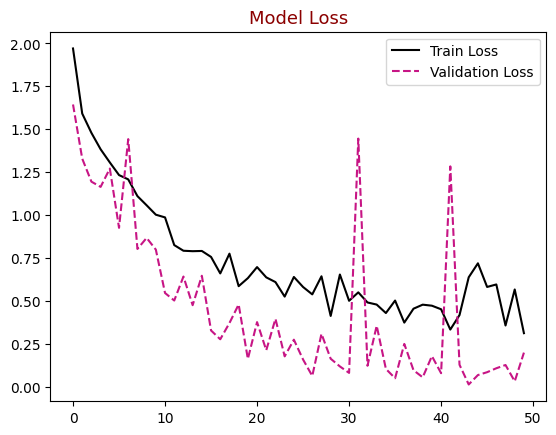

In [25]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["test_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

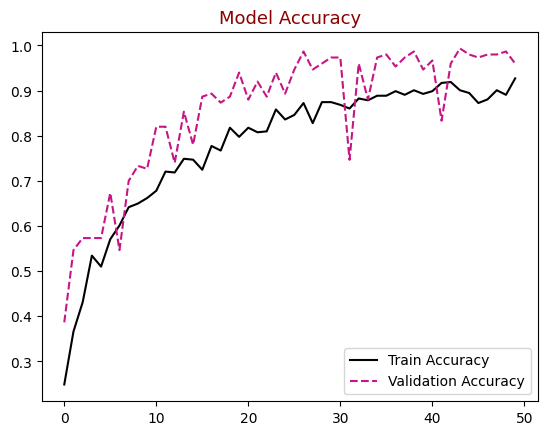

In [26]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["Test_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [27]:
print(test_generator.class_indices)

{'ApplePie': 0, 'BagelSandwich': 1, 'Bibimbop': 2, 'Bread': 3, 'FriedRice': 4, 'Pork': 5}


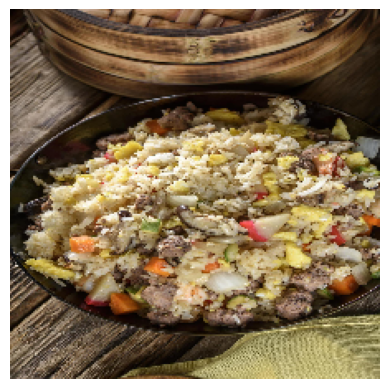

In [28]:
#Displaying the selected image
img = load_img(test_dir + "/FriedRice/B010443XX_10190.jpg", target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image
def load(filename):
    np_image = Image.open(test_dir + "/FriedRice/B010443XX_10190.jpg")
    np_image = np_image.resize((224,224))
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(img)

In [29]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

1/1 [==============================] - 0s 307ms/step
[4]
